# Using a custom made dataset to detect bolts using Mediapipe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip
!pip install 'keras<3.0.0' mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import tensorflow as tf
assert tf.__version__.startswith('2')
from google.colab import files

from mediapipe_model_maker import object_detector

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Creating the steps for training

In [ ]:
class TransferLearning():
    """ Transfer Learning class for object detection using MediaPipe Model Maker
    2 datasets are required: train and validation
    
    Attributes:
        train_dataset_path: path to the train dataset
        validation_dataset_path: path to the validation dataset
        model: model to be trained
        train_data: train dataset
        validation_data: validation dataset
    """
    def __init__(self):
        self.train_dataset_path = "/content/drive/MyDrive/Detection-nuts-bolts.v1i.voc/train"
        self.validation_dataset_path = "/content/drive/MyDrive/Detection-nuts-bolts.v1i.voc/valid"
        self.model = None
        self.train_data = None
        self.validation_data = None
        self.hparams = None
        self.options = None
        
    def load_data(self):
        """ Load train and validation datasets from the given paths        """
        self.train_data = object_detector.DataLoader.from_pascal_voc(self.train_dataset_path)
        self.validation_data = object_detector.DataLoader.from_pascal_voc(self.validation_dataset_path)
    
    def train_model(self,batch_size=8, learning_rate=0.3, epochs=100, export_dir='exported_model'):
        """ Train the model using the loaded datasets
        
        Args:
            batch_size: batch size for training
            learning_rate: learning rate for training
            epochs: number of epochs for training
            export_dir: directory to export the trained model
        """
        self.hparams = object_detector.HParams(batch_size, learning_rate, epochs, export_dir)
        self.options = object_detector.ObjectDetectorOptions(
            supported_model=object_detector.SupportedModels.MOBILENET_V2,
            hparams=self.hparams
        )
        
        self.model = object_detector.ObjectDetector.create(
            train_data=self.train_data,
            validation_data=self.val_data,
            options=self.options)

    def evaluate_model(self,batch_size=8):
        """ Evaluate the trained model 
        
        Args:
            batch_size: batch size for evaluation
        """
        loss, metrics = self.model.evaluate(self.validation_data,batch_size)
        print(f"Validation loss: {loss}")
        print(f"Validation coco metrics: {metrics}")
    
    def export_model(self):
        """ Export the trained model """
        self.model.export_model('bolt-detection.tflite')
        print(f"Model exported")
    
    




## Loading the data, and training

In [ ]:
TransferLearning_model = TransferLearning()
TransferLearning_model.load_data()
TransferLearning_model.train_model()

Model: "retina_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobile_net_1 (MobileNet)    {'2': (None, 64, 64, 24   2257984   
                             ),                                  
                              '3': (None, 32, 32, 32             
                             ),                                  
                              '4': (None, 16, 16, 96             
                             ),                                  
                              '5': (None, 8, 8, 320)             
                             , '6': (None, 8, 8, 128             
                             0)}                                 
                                                                 
 fpn_1 (FPN)                 {'5': (None, 8, 8, 128)   149056    
                             , '4': (None, 16, 16, 1             
                             28),                 

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


30/30 [==============================] - 66s 441ms/step - total_loss: 14.3356 - cls_loss: 13.9902 - box_loss: 0.0058 - model_loss: 14.2806 - val_total_loss: 1.0421 - val_cls_loss: 0.8848 - val_box_loss: 0.0020 - val_model_loss: 0.9872
Epoch 2/100
30/30 [==============================] - 5s 176ms/step - total_loss: 1.1946 - cls_loss: 0.9375 - box_loss: 0.0040 - model_loss: 1.1396 - val_total_loss: 0.8976 - val_cls_loss: 0.7552 - val_box_loss: 0.0017 - val_model_loss: 0.8426
Epoch 3/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.9612 - cls_loss: 0.7566 - box_loss: 0.0030 - model_loss: 0.9062 - val_total_loss: 0.6888 - val_cls_loss: 0.5560 - val_box_loss: 0.0016 - val_model_loss: 0.6338
Epoch 4/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.7521 - cls_loss: 0.5655 - box_loss: 0.0026 - model_loss: 0.6972 - val_total_loss: 0.5471 - val_cls_loss: 0.4144 - val_box_loss: 0.0016 - val_model_loss: 0.4921
Epoch 5/100
30/30 [=================

## Evaluating the model 

In [ ]:
TransferLearning_model.evaluate_model()
TransferLearning_model.export_model()


C:\Users\aditi\AppData\Local\Temp\ipykernel_23036\2398901187.py:218: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, 2)


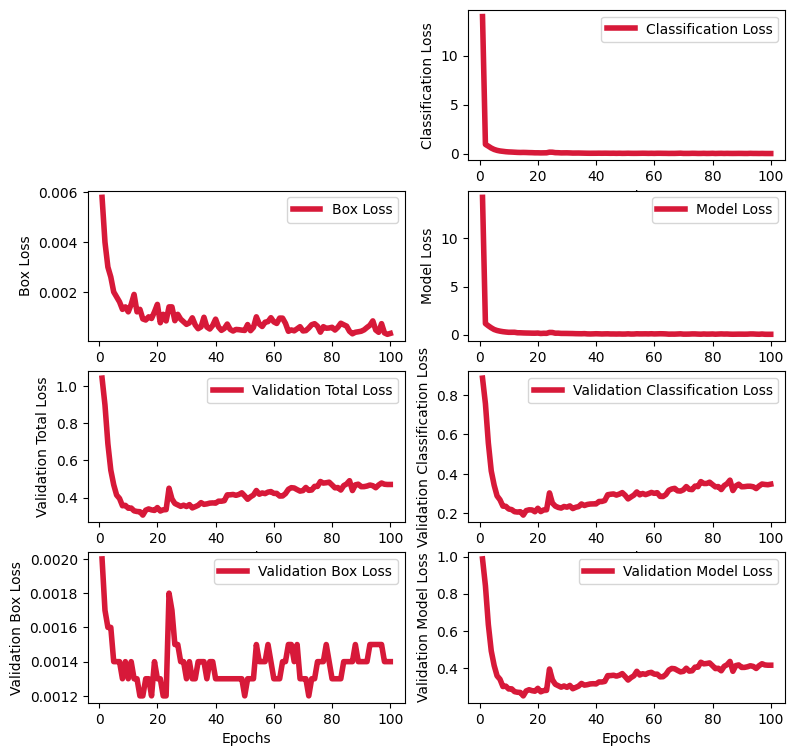

<Figure size 640x480 with 0 Axes>

In [4]:
import re
import matplotlib.pyplot as plt
txt_file = """0/30 [==============================] - 66s 441ms/step - total_loss: 14.3356 - cls_loss: 13.9902 - box_loss: 0.0058 - model_loss: 14.2806 - val_total_loss: 1.0421 - val_cls_loss: 0.8848 - val_box_loss: 0.0020 - val_model_loss: 0.9872
Epoch 2/100
30/30 [==============================] - 5s 176ms/step - total_loss: 1.1946 - cls_loss: 0.9375 - box_loss: 0.0040 - model_loss: 1.1396 - val_total_loss: 0.8976 - val_cls_loss: 0.7552 - val_box_loss: 0.0017 - val_model_loss: 0.8426
Epoch 3/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.9612 - cls_loss: 0.7566 - box_loss: 0.0030 - model_loss: 0.9062 - val_total_loss: 0.6888 - val_cls_loss: 0.5560 - val_box_loss: 0.0016 - val_model_loss: 0.6338
Epoch 4/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.7521 - cls_loss: 0.5655 - box_loss: 0.0026 - model_loss: 0.6972 - val_total_loss: 0.5471 - val_cls_loss: 0.4144 - val_box_loss: 0.0016 - val_model_loss: 0.4921
Epoch 5/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.5779 - cls_loss: 0.4233 - box_loss: 0.0020 - model_loss: 0.5229 - val_total_loss: 0.4687 - val_cls_loss: 0.3420 - val_box_loss: 0.0014 - val_model_loss: 0.4137
Epoch 6/100
30/30 [==============================] - 6s 211ms/step - total_loss: 0.4730 - cls_loss: 0.3290 - box_loss: 0.0018 - model_loss: 0.4181 - val_total_loss: 0.4130 - val_cls_loss: 0.2878 - val_box_loss: 0.0014 - val_model_loss: 0.3580
Epoch 7/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.4050 - cls_loss: 0.2677 - box_loss: 0.0016 - model_loss: 0.3501 - val_total_loss: 0.3947 - val_cls_loss: 0.2682 - val_box_loss: 0.0014 - val_model_loss: 0.3398
Epoch 8/100
30/30 [==============================] - 6s 189ms/step - total_loss: 0.3531 - cls_loss: 0.2312 - box_loss: 0.0013 - model_loss: 0.2981 - val_total_loss: 0.3557 - val_cls_loss: 0.2361 - val_box_loss: 0.0013 - val_model_loss: 0.3007
Epoch 9/100
30/30 [==============================] - 5s 172ms/step - total_loss: 0.3165 - cls_loss: 0.1939 - box_loss: 0.0014 - model_loss: 0.2615 - val_total_loss: 0.3577 - val_cls_loss: 0.2351 - val_box_loss: 0.0014 - val_model_loss: 0.3028
Epoch 10/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.2874 - cls_loss: 0.1704 - box_loss: 0.0012 - model_loss: 0.2324 - val_total_loss: 0.3425 - val_cls_loss: 0.2216 - val_box_loss: 0.0013 - val_model_loss: 0.2875
Epoch 11/100
30/30 [==============================] - 7s 240ms/step - total_loss: 0.2890 - cls_loss: 0.1581 - box_loss: 0.0015 - model_loss: 0.2341 - val_total_loss: 0.3433 - val_cls_loss: 0.2185 - val_box_loss: 0.0014 - val_model_loss: 0.2883
Epoch 12/100
30/30 [==============================] - 6s 205ms/step - total_loss: 0.2900 - cls_loss: 0.1405 - box_loss: 0.0019 - model_loss: 0.2351 - val_total_loss: 0.3282 - val_cls_loss: 0.2080 - val_box_loss: 0.0013 - val_model_loss: 0.2732
Epoch 13/100
30/30 [==============================] - 6s 198ms/step - total_loss: 0.2404 - cls_loss: 0.1235 - box_loss: 0.0012 - model_loss: 0.1854 - val_total_loss: 0.3248 - val_cls_loss: 0.2061 - val_box_loss: 0.0013 - val_model_loss: 0.2699
Epoch 14/100
30/30 [==============================] - 6s 206ms/step - total_loss: 0.2353 - cls_loss: 0.1144 - box_loss: 0.0013 - model_loss: 0.1804 - val_total_loss: 0.3236 - val_cls_loss: 0.2079 - val_box_loss: 0.0012 - val_model_loss: 0.2686
Epoch 15/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.2212 - cls_loss: 0.1204 - box_loss: 9.1521e-04 - model_loss: 0.1662 - val_total_loss: 0.3054 - val_cls_loss: 0.1907 - val_box_loss: 0.0012 - val_model_loss: 0.2504
Epoch 16/100
30/30 [==============================] - 6s 213ms/step - total_loss: 0.2121 - cls_loss: 0.1135 - box_loss: 8.7249e-04 - model_loss: 0.1571 - val_total_loss: 0.3318 - val_cls_loss: 0.2135 - val_box_loss: 0.0013 - val_model_loss: 0.2769
Epoch 17/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.2067 - cls_loss: 0.1011 - box_loss: 0.0010 - model_loss: 0.1518 - val_total_loss: 0.3385 - val_cls_loss: 0.2174 - val_box_loss: 0.0013 - val_model_loss: 0.2835
Epoch 18/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.1969 - cls_loss: 0.0953 - box_loss: 9.3325e-04 - model_loss: 0.1419 - val_total_loss: 0.3334 - val_cls_loss: 0.2168 - val_box_loss: 0.0012 - val_model_loss: 0.2784
Epoch 19/100
30/30 [==============================] - 5s 168ms/step - total_loss: 0.1938 - cls_loss: 0.0807 - box_loss: 0.0012 - model_loss: 0.1389 - val_total_loss: 0.3305 - val_cls_loss: 0.2077 - val_box_loss: 0.0014 - val_model_loss: 0.2755
Epoch 20/100
30/30 [==============================] - 6s 199ms/step - total_loss: 0.2085 - cls_loss: 0.0807 - box_loss: 0.0015 - model_loss: 0.1535 - val_total_loss: 0.3459 - val_cls_loss: 0.2253 - val_box_loss: 0.0013 - val_model_loss: 0.2910
Epoch 21/100
30/30 [==============================] - 5s 168ms/step - total_loss: 0.1651 - cls_loss: 0.0721 - box_loss: 7.6187e-04 - model_loss: 0.1102 - val_total_loss: 0.3273 - val_cls_loss: 0.2085 - val_box_loss: 0.0013 - val_model_loss: 0.2723
Epoch 22/100
30/30 [==============================] - 6s 199ms/step - total_loss: 0.1857 - cls_loss: 0.0766 - box_loss: 0.0011 - model_loss: 0.1308 - val_total_loss: 0.3338 - val_cls_loss: 0.2168 - val_box_loss: 0.0012 - val_model_loss: 0.2788
Epoch 23/100
30/30 [==============================] - 6s 204ms/step - total_loss: 0.1784 - cls_loss: 0.0817 - box_loss: 8.3515e-04 - model_loss: 0.1235 - val_total_loss: 0.3349 - val_cls_loss: 0.2178 - val_box_loss: 0.0012 - val_model_loss: 0.2800
Epoch 24/100
30/30 [==============================] - 5s 169ms/step - total_loss: 0.2730 - cls_loss: 0.1471 - box_loss: 0.0014 - model_loss: 0.2180 - val_total_loss: 0.4500 - val_cls_loss: 0.3031 - val_box_loss: 0.0018 - val_model_loss: 0.3949
Epoch 25/100
30/30 [==============================] - 6s 189ms/step - total_loss: 0.2669 - cls_loss: 0.1418 - box_loss: 0.0014 - model_loss: 0.2118 - val_total_loss: 0.3923 - val_cls_loss: 0.2517 - val_box_loss: 0.0017 - val_model_loss: 0.3372
Epoch 26/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.1942 - cls_loss: 0.0968 - box_loss: 8.4464e-04 - model_loss: 0.1390 - val_total_loss: 0.3679 - val_cls_loss: 0.2363 - val_box_loss: 0.0015 - val_model_loss: 0.3128
Epoch 27/100
30/30 [==============================] - 6s 211ms/step - total_loss: 0.1984 - cls_loss: 0.0896 - box_loss: 0.0011 - model_loss: 0.1433 - val_total_loss: 0.3603 - val_cls_loss: 0.2296 - val_box_loss: 0.0015 - val_model_loss: 0.3051
Epoch 28/100
30/30 [==============================] - 6s 200ms/step - total_loss: 0.1724 - cls_loss: 0.0719 - box_loss: 9.0732e-04 - model_loss: 0.1173 - val_total_loss: 0.3525 - val_cls_loss: 0.2263 - val_box_loss: 0.0014 - val_model_loss: 0.2973
Epoch 29/100
30/30 [==============================] - 5s 176ms/step - total_loss: 0.1706 - cls_loss: 0.0753 - box_loss: 8.0214e-04 - model_loss: 0.1155 - val_total_loss: 0.3587 - val_cls_loss: 0.2341 - val_box_loss: 0.0014 - val_model_loss: 0.3036
Epoch 30/100
30/30 [==============================] - 5s 168ms/step - total_loss: 0.1683 - cls_loss: 0.0783 - box_loss: 6.9788e-04 - model_loss: 0.1132 - val_total_loss: 0.3515 - val_cls_loss: 0.2311 - val_box_loss: 0.0013 - val_model_loss: 0.2964
Epoch 31/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.1615 - cls_loss: 0.0685 - box_loss: 7.5762e-04 - model_loss: 0.1064 - val_total_loss: 0.3618 - val_cls_loss: 0.2374 - val_box_loss: 0.0014 - val_model_loss: 0.3067
Epoch 32/100
30/30 [==============================] - 5s 172ms/step - total_loss: 0.1568 - cls_loss: 0.0537 - box_loss: 9.6010e-04 - model_loss: 0.1017 - val_total_loss: 0.3441 - val_cls_loss: 0.2237 - val_box_loss: 0.0013 - val_model_loss: 0.2889
Epoch 33/100
30/30 [==============================] - 6s 190ms/step - total_loss: 0.1450 - cls_loss: 0.0562 - box_loss: 6.7395e-04 - model_loss: 0.0899 - val_total_loss: 0.3508 - val_cls_loss: 0.2304 - val_box_loss: 0.0013 - val_model_loss: 0.2957
Epoch 34/100
30/30 [==============================] - 6s 203ms/step - total_loss: 0.1400 - cls_loss: 0.0587 - box_loss: 5.2355e-04 - model_loss: 0.0849 - val_total_loss: 0.3581 - val_cls_loss: 0.2337 - val_box_loss: 0.0014 - val_model_loss: 0.3030
Epoch 35/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.1359 - cls_loss: 0.0509 - box_loss: 5.9696e-04 - model_loss: 0.0808 - val_total_loss: 0.3723 - val_cls_loss: 0.2470 - val_box_loss: 0.0014 - val_model_loss: 0.3172
Epoch 36/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.1478 - cls_loss: 0.0436 - box_loss: 9.8155e-04 - model_loss: 0.0927 - val_total_loss: 0.3633 - val_cls_loss: 0.2393 - val_box_loss: 0.0014 - val_model_loss: 0.3082
Epoch 37/100
30/30 [==============================] - 6s 196ms/step - total_loss: 0.1221 - cls_loss: 0.0376 - box_loss: 5.8971e-04 - model_loss: 0.0670 - val_total_loss: 0.3657 - val_cls_loss: 0.2446 - val_box_loss: 0.0013 - val_model_loss: 0.3106
Epoch 38/100
30/30 [==============================] - 6s 210ms/step - total_loss: 0.1150 - cls_loss: 0.0345 - box_loss: 5.0973e-04 - model_loss: 0.0599 - val_total_loss: 0.3698 - val_cls_loss: 0.2469 - val_box_loss: 0.0014 - val_model_loss: 0.3147
Epoch 39/100
30/30 [==============================] - 6s 184ms/step - total_loss: 0.1236 - cls_loss: 0.0358 - box_loss: 6.5545e-04 - model_loss: 0.0685 - val_total_loss: 0.3709 - val_cls_loss: 0.2474 - val_box_loss: 0.0014 - val_model_loss: 0.3158
Epoch 40/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.1369 - cls_loss: 0.0365 - box_loss: 9.0680e-04 - model_loss: 0.0818 - val_total_loss: 0.3698 - val_cls_loss: 0.2475 - val_box_loss: 0.0013 - val_model_loss: 0.3147
Epoch 41/100
30/30 [==============================] - 6s 200ms/step - total_loss: 0.1268 - cls_loss: 0.0422 - box_loss: 5.9183e-04 - model_loss: 0.0717 - val_total_loss: 0.3802 - val_cls_loss: 0.2596 - val_box_loss: 0.0013 - val_model_loss: 0.3252
Epoch 42/100
30/30 [==============================] - 5s 169ms/step - total_loss: 0.1141 - cls_loss: 0.0362 - box_loss: 4.5653e-04 - model_loss: 0.0591 - val_total_loss: 0.3801 - val_cls_loss: 0.2600 - val_box_loss: 0.0013 - val_model_loss: 0.3251
Epoch 43/100
30/30 [==============================] - 6s 213ms/step - total_loss: 0.1229 - cls_loss: 0.0412 - box_loss: 5.3317e-04 - model_loss: 0.0679 - val_total_loss: 0.3831 - val_cls_loss: 0.2646 - val_box_loss: 0.0013 - val_model_loss: 0.3281
Epoch 44/100
30/30 [==============================] - 6s 183ms/step - total_loss: 0.1282 - cls_loss: 0.0377 - box_loss: 7.0942e-04 - model_loss: 0.0731 - val_total_loss: 0.4143 - val_cls_loss: 0.2939 - val_box_loss: 0.0013 - val_model_loss: 0.3593
Epoch 45/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.1121 - cls_loss: 0.0323 - box_loss: 4.9546e-04 - model_loss: 0.0570 - val_total_loss: 0.4145 - val_cls_loss: 0.2963 - val_box_loss: 0.0013 - val_model_loss: 0.3595
Epoch 46/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.1132 - cls_loss: 0.0367 - box_loss: 4.2932e-04 - model_loss: 0.0582 - val_total_loss: 0.4164 - val_cls_loss: 0.2979 - val_box_loss: 0.0013 - val_model_loss: 0.3614
Epoch 47/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.1073 - cls_loss: 0.0276 - box_loss: 4.9285e-04 - model_loss: 0.0522 - val_total_loss: 0.4117 - val_cls_loss: 0.2921 - val_box_loss: 0.0013 - val_model_loss: 0.3567
Epoch 48/100
30/30 [==============================] - 6s 200ms/step - total_loss: 0.1153 - cls_loss: 0.0361 - box_loss: 4.8306e-04 - model_loss: 0.0603 - val_total_loss: 0.4164 - val_cls_loss: 0.2973 - val_box_loss: 0.0013 - val_model_loss: 0.3614
Epoch 49/100
30/30 [==============================] - 5s 177ms/step - total_loss: 0.1034 - cls_loss: 0.0251 - box_loss: 4.6587e-04 - model_loss: 0.0484 - val_total_loss: 0.4252 - val_cls_loss: 0.3047 - val_box_loss: 0.0013 - val_model_loss: 0.3702
Epoch 50/100
30/30 [==============================] - 6s 208ms/step - total_loss: 0.1059 - cls_loss: 0.0282 - box_loss: 4.5344e-04 - model_loss: 0.0508 - val_total_loss: 0.4087 - val_cls_loss: 0.2913 - val_box_loss: 0.0012 - val_model_loss: 0.3537
Epoch 51/100
30/30 [==============================] - 5s 169ms/step - total_loss: 0.1270 - cls_loss: 0.0375 - box_loss: 6.9003e-04 - model_loss: 0.0720 - val_total_loss: 0.3905 - val_cls_loss: 0.2727 - val_box_loss: 0.0013 - val_model_loss: 0.3355
Epoch 52/100
30/30 [==============================] - 6s 207ms/step - total_loss: 0.1051 - cls_loss: 0.0278 - box_loss: 4.4440e-04 - model_loss: 0.0501 - val_total_loss: 0.4038 - val_cls_loss: 0.2828 - val_box_loss: 0.0013 - val_model_loss: 0.3488
Epoch 53/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.1089 - cls_loss: 0.0251 - box_loss: 5.7645e-04 - model_loss: 0.0539 - val_total_loss: 0.4134 - val_cls_loss: 0.2921 - val_box_loss: 0.0013 - val_model_loss: 0.3584
Epoch 54/100
30/30 [==============================] - 6s 211ms/step - total_loss: 0.1325 - cls_loss: 0.0270 - box_loss: 0.0010 - model_loss: 0.0775 - val_total_loss: 0.4376 - val_cls_loss: 0.3080 - val_box_loss: 0.0015 - val_model_loss: 0.3826
Epoch 55/100
30/30 [==============================] - 6s 198ms/step - total_loss: 0.1220 - cls_loss: 0.0314 - box_loss: 7.1229e-04 - model_loss: 0.0670 - val_total_loss: 0.4177 - val_cls_loss: 0.2935 - val_box_loss: 0.0014 - val_model_loss: 0.3627
Epoch 56/100
30/30 [==============================] - 5s 172ms/step - total_loss: 0.1226 - cls_loss: 0.0370 - box_loss: 6.1162e-04 - model_loss: 0.0676 - val_total_loss: 0.4244 - val_cls_loss: 0.3003 - val_box_loss: 0.0014 - val_model_loss: 0.3694
Epoch 57/100
30/30 [==============================] - 6s 201ms/step - total_loss: 0.1268 - cls_loss: 0.0327 - box_loss: 7.8454e-04 - model_loss: 0.0719 - val_total_loss: 0.4210 - val_cls_loss: 0.2944 - val_box_loss: 0.0014 - val_model_loss: 0.3661
Epoch 58/100
30/30 [==============================] - 6s 193ms/step - total_loss: 0.1200 - cls_loss: 0.0247 - box_loss: 8.0744e-04 - model_loss: 0.0651 - val_total_loss: 0.4291 - val_cls_loss: 0.2992 - val_box_loss: 0.0015 - val_model_loss: 0.3741
Epoch 59/100
30/30 [==============================] - 5s 172ms/step - total_loss: 0.1347 - cls_loss: 0.0315 - box_loss: 9.6482e-04 - model_loss: 0.0797 - val_total_loss: 0.4318 - val_cls_loss: 0.3055 - val_box_loss: 0.0014 - val_model_loss: 0.3769
Epoch 60/100
30/30 [==============================] - 6s 204ms/step - total_loss: 0.1175 - cls_loss: 0.0228 - box_loss: 7.9551e-04 - model_loss: 0.0625 - val_total_loss: 0.4222 - val_cls_loss: 0.3009 - val_box_loss: 0.0013 - val_model_loss: 0.3673
Epoch 61/100
30/30 [==============================] - 5s 171ms/step - total_loss: 0.1253 - cls_loss: 0.0336 - box_loss: 7.3396e-04 - model_loss: 0.0703 - val_total_loss: 0.4221 - val_cls_loss: 0.3044 - val_box_loss: 0.0013 - val_model_loss: 0.3672
Epoch 62/100
30/30 [==============================] - 5s 171ms/step - total_loss: 0.1357 - cls_loss: 0.0332 - box_loss: 9.5000e-04 - model_loss: 0.0807 - val_total_loss: 0.4078 - val_cls_loss: 0.2856 - val_box_loss: 0.0013 - val_model_loss: 0.3529
Epoch 63/100
30/30 [==============================] - 6s 188ms/step - total_loss: 0.1301 - cls_loss: 0.0278 - box_loss: 9.4730e-04 - model_loss: 0.0752 - val_total_loss: 0.4084 - val_cls_loss: 0.2850 - val_box_loss: 0.0014 - val_model_loss: 0.3535
Epoch 64/100
30/30 [==============================] - 6s 194ms/step - total_loss: 0.1176 - cls_loss: 0.0258 - box_loss: 7.3795e-04 - model_loss: 0.0627 - val_total_loss: 0.4209 - val_cls_loss: 0.2949 - val_box_loss: 0.0014 - val_model_loss: 0.3660
Epoch 65/100
30/30 [==============================] - 7s 214ms/step - total_loss: 0.0941 - cls_loss: 0.0183 - box_loss: 4.1812e-04 - model_loss: 0.0392 - val_total_loss: 0.4439 - val_cls_loss: 0.3164 - val_box_loss: 0.0015 - val_model_loss: 0.3890
Epoch 66/100
30/30 [==============================] - 7s 214ms/step - total_loss: 0.1001 - cls_loss: 0.0215 - box_loss: 4.7330e-04 - model_loss: 0.0452 - val_total_loss: 0.4528 - val_cls_loss: 0.3231 - val_box_loss: 0.0015 - val_model_loss: 0.3979
Epoch 67/100
30/30 [==============================] - 6s 205ms/step - total_loss: 0.0969 - cls_loss: 0.0201 - box_loss: 4.3725e-04 - model_loss: 0.0419 - val_total_loss: 0.4511 - val_cls_loss: 0.3262 - val_box_loss: 0.0014 - val_model_loss: 0.3962
Epoch 68/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.1109 - cls_loss: 0.0300 - box_loss: 5.1976e-04 - model_loss: 0.0560 - val_total_loss: 0.4423 - val_cls_loss: 0.3137 - val_box_loss: 0.0015 - val_model_loss: 0.3874
Epoch 69/100
30/30 [==============================] - 5s 178ms/step - total_loss: 0.1259 - cls_loss: 0.0408 - box_loss: 6.0400e-04 - model_loss: 0.0710 - val_total_loss: 0.4344 - val_cls_loss: 0.3124 - val_box_loss: 0.0013 - val_model_loss: 0.3795
Epoch 70/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.0959 - cls_loss: 0.0193 - box_loss: 4.3317e-04 - model_loss: 0.0410 - val_total_loss: 0.4373 - val_cls_loss: 0.3190 - val_box_loss: 0.0013 - val_model_loss: 0.3824
Epoch 71/100
30/30 [==============================] - 6s 194ms/step - total_loss: 0.0959 - cls_loss: 0.0186 - box_loss: 4.4751e-04 - model_loss: 0.0410 - val_total_loss: 0.4540 - val_cls_loss: 0.3352 - val_box_loss: 0.0013 - val_model_loss: 0.3991
Epoch 72/100
30/30 [==============================] - 5s 168ms/step - total_loss: 0.1016 - cls_loss: 0.0191 - box_loss: 5.5197e-04 - model_loss: 0.0467 - val_total_loss: 0.4385 - val_cls_loss: 0.3216 - val_box_loss: 0.0012 - val_model_loss: 0.3836
Epoch 73/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.1186 - cls_loss: 0.0295 - box_loss: 6.8361e-04 - model_loss: 0.0637 - val_total_loss: 0.4404 - val_cls_loss: 0.3198 - val_box_loss: 0.0013 - val_model_loss: 0.3855
Epoch 74/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.1171 - cls_loss: 0.0261 - box_loss: 7.2368e-04 - model_loss: 0.0623 - val_total_loss: 0.4599 - val_cls_loss: 0.3378 - val_box_loss: 0.0013 - val_model_loss: 0.4050
Epoch 75/100
30/30 [==============================] - 6s 191ms/step - total_loss: 0.1011 - cls_loss: 0.0151 - box_loss: 6.2282e-04 - model_loss: 0.0463 - val_total_loss: 0.4596 - val_cls_loss: 0.3351 - val_box_loss: 0.0014 - val_model_loss: 0.4048
Epoch 76/100
30/30 [==============================] - 6s 185ms/step - total_loss: 0.0905 - cls_loss: 0.0164 - box_loss: 3.8389e-04 - model_loss: 0.0356 - val_total_loss: 0.4861 - val_cls_loss: 0.3605 - val_box_loss: 0.0014 - val_model_loss: 0.4313
Epoch 77/100
30/30 [==============================] - 6s 209ms/step - total_loss: 0.1114 - cls_loss: 0.0264 - box_loss: 6.0414e-04 - model_loss: 0.0566 - val_total_loss: 0.4776 - val_cls_loss: 0.3508 - val_box_loss: 0.0014 - val_model_loss: 0.4228
Epoch 78/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.0958 - cls_loss: 0.0138 - box_loss: 5.4198e-04 - model_loss: 0.0409 - val_total_loss: 0.4794 - val_cls_loss: 0.3509 - val_box_loss: 0.0015 - val_model_loss: 0.4246
Epoch 79/100
30/30 [==============================] - 5s 174ms/step - total_loss: 0.1001 - cls_loss: 0.0177 - box_loss: 5.5167e-04 - model_loss: 0.0452 - val_total_loss: 0.4825 - val_cls_loss: 0.3575 - val_box_loss: 0.0014 - val_model_loss: 0.4277
Epoch 80/100
30/30 [==============================] - 6s 186ms/step - total_loss: 0.1118 - cls_loss: 0.0280 - box_loss: 5.8003e-04 - model_loss: 0.0570 - val_total_loss: 0.4675 - val_cls_loss: 0.3453 - val_box_loss: 0.0013 - val_model_loss: 0.4127
Epoch 81/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.0891 - cls_loss: 0.0109 - box_loss: 4.6892e-04 - model_loss: 0.0343 - val_total_loss: 0.4521 - val_cls_loss: 0.3339 - val_box_loss: 0.0013 - val_model_loss: 0.3972
Epoch 82/100
30/30 [==============================] - 5s 177ms/step - total_loss: 0.1048 - cls_loss: 0.0209 - box_loss: 5.8195e-04 - model_loss: 0.0500 - val_total_loss: 0.4535 - val_cls_loss: 0.3352 - val_box_loss: 0.0013 - val_model_loss: 0.3987
Epoch 83/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.1186 - cls_loss: 0.0267 - box_loss: 7.4208e-04 - model_loss: 0.0638 - val_total_loss: 0.4401 - val_cls_loss: 0.3200 - val_box_loss: 0.0013 - val_model_loss: 0.3853
Epoch 84/100
30/30 [==============================] - 6s 184ms/step - total_loss: 0.1037 - cls_loss: 0.0148 - box_loss: 6.8151e-04 - model_loss: 0.0489 - val_total_loss: 0.4640 - val_cls_loss: 0.3401 - val_box_loss: 0.0014 - val_model_loss: 0.4092
Epoch 85/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.1100 - cls_loss: 0.0239 - box_loss: 6.2668e-04 - model_loss: 0.0552 - val_total_loss: 0.4728 - val_cls_loss: 0.3497 - val_box_loss: 0.0014 - val_model_loss: 0.4180
Epoch 86/100
30/30 [==============================] - 6s 203ms/step - total_loss: 0.0926 - cls_loss: 0.0169 - box_loss: 4.1826e-04 - model_loss: 0.0378 - val_total_loss: 0.4905 - val_cls_loss: 0.3678 - val_box_loss: 0.0014 - val_model_loss: 0.4357
Epoch 87/100
30/30 [==============================] - 6s 203ms/step - total_loss: 0.0854 - cls_loss: 0.0147 - box_loss: 3.1862e-04 - model_loss: 0.0306 - val_total_loss: 0.4375 - val_cls_loss: 0.3151 - val_box_loss: 0.0014 - val_model_loss: 0.3827
Epoch 88/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.0903 - cls_loss: 0.0165 - box_loss: 3.8001e-04 - model_loss: 0.0355 - val_total_loss: 0.4681 - val_cls_loss: 0.3383 - val_box_loss: 0.0015 - val_model_loss: 0.4133
Epoch 89/100
30/30 [==============================] - 6s 204ms/step - total_loss: 0.0956 - cls_loss: 0.0209 - box_loss: 3.9925e-04 - model_loss: 0.0408 - val_total_loss: 0.4716 - val_cls_loss: 0.3471 - val_box_loss: 0.0014 - val_model_loss: 0.4169
Epoch 90/100
30/30 [==============================] - 6s 206ms/step - total_loss: 0.0940 - cls_loss: 0.0182 - box_loss: 4.2096e-04 - model_loss: 0.0393 - val_total_loss: 0.4583 - val_cls_loss: 0.3342 - val_box_loss: 0.0014 - val_model_loss: 0.4035
Epoch 91/100
30/30 [==============================] - 6s 210ms/step - total_loss: 0.0909 - cls_loss: 0.0123 - box_loss: 4.7623e-04 - model_loss: 0.0361 - val_total_loss: 0.4585 - val_cls_loss: 0.3349 - val_box_loss: 0.0014 - val_model_loss: 0.4037
Epoch 92/100
30/30 [==============================] - 6s 181ms/step - total_loss: 0.0949 - cls_loss: 0.0115 - box_loss: 5.7280e-04 - model_loss: 0.0402 - val_total_loss: 0.4616 - val_cls_loss: 0.3369 - val_box_loss: 0.0014 - val_model_loss: 0.4069
Epoch 93/100
30/30 [==============================] - 5s 175ms/step - total_loss: 0.1141 - cls_loss: 0.0263 - box_loss: 6.6052e-04 - model_loss: 0.0593 - val_total_loss: 0.4672 - val_cls_loss: 0.3369 - val_box_loss: 0.0015 - val_model_loss: 0.4124
Epoch 94/100
30/30 [==============================] - 6s 210ms/step - total_loss: 0.1126 - cls_loss: 0.0160 - box_loss: 8.3728e-04 - model_loss: 0.0579 - val_total_loss: 0.4634 - val_cls_loss: 0.3342 - val_box_loss: 0.0015 - val_model_loss: 0.4087
Epoch 95/100
30/30 [==============================] - 6s 209ms/step - total_loss: 0.0937 - cls_loss: 0.0155 - box_loss: 4.7037e-04 - model_loss: 0.0390 - val_total_loss: 0.4526 - val_cls_loss: 0.3252 - val_box_loss: 0.0015 - val_model_loss: 0.3979
Epoch 96/100
30/30 [==============================] - 5s 172ms/step - total_loss: 0.0838 - cls_loss: 0.0101 - box_loss: 3.7900e-04 - model_loss: 0.0290 - val_total_loss: 0.4674 - val_cls_loss: 0.3381 - val_box_loss: 0.0015 - val_model_loss: 0.4127
Epoch 97/100
30/30 [==============================] - 6s 202ms/step - total_loss: 0.1081 - cls_loss: 0.0171 - box_loss: 7.2588e-04 - model_loss: 0.0534 - val_total_loss: 0.4780 - val_cls_loss: 0.3481 - val_box_loss: 0.0015 - val_model_loss: 0.4233
Epoch 98/100
30/30 [==============================] - 5s 170ms/step - total_loss: 0.0818 - cls_loss: 0.0094 - box_loss: 3.5368e-04 - model_loss: 0.0271 - val_total_loss: 0.4714 - val_cls_loss: 0.3459 - val_box_loss: 0.0014 - val_model_loss: 0.4167
Epoch 99/100
30/30 [==============================] - 5s 168ms/step - total_loss: 0.0778 - cls_loss: 0.0082 - box_loss: 2.9762e-04 - model_loss: 0.0231 - val_total_loss: 0.4700 - val_cls_loss: 0.3445 - val_box_loss: 0.0014 - val_model_loss: 0.4153
Epoch 100/100
30/30 [==============================] - 5s 173ms/step - total_loss: 0.0788 - cls_loss: 0.0074 - box_loss: 3.3287e-04 - model_loss: 0.0241 - val_total_loss: 0.4701 - val_cls_loss: 0.3474 - val_box_loss: 0.0014 - val_model_loss: 0.4154
"""

pattern = r"total_loss: (\d+\.\d+(?:e[+-]?\d+)?) - cls_loss: (\d+\.\d+(?:e[+-]?\d+)?) - box_loss: (\d+\.\d+(?:e[+-]?\d+)?) - model_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_total_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_cls_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_box_loss: (\d+\.\d+(?:e[+-]?\d+)?) - val_model_loss: (\d+\.\d+(?:e[+-]?\d+)?)"

matches = re.findall(pattern, txt_file)
# Convert the matched strings to float and separate them into lists
total_losses, cls_losses, box_losses, model_losses, val_total_losses, val_cls_losses, val_box_losses, val_model_losses = zip(*((float(total), float(cls), float(box), float(model), float(val_total), float(val_cls), float(val_box), float(val_model)) 
                                                           for total, cls, box, model,val_total, val_cls, val_box, val_model in matches))

epochs = range(1, len(total_losses) + 1)

plt.figure(figsize=(9,9))
plt.plot(epochs, total_losses, ('#D71939'), label="Total Loss", linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Total Loss")
plt.legend()
plt.subplot(4, 2, 2)
plt.plot(epochs, cls_losses, ('#D71939'), label="Classification Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Classification Loss")
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(epochs, box_losses, ('#D71939'), label="Box Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Box Loss")
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(epochs, model_losses, ('#D71939'), label="Model Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(epochs, val_total_losses, ('#D71939'), label="Validation Total Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Validation Total Loss")
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(epochs, val_cls_losses, ('#D71939'), label="Validation Classification Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Validation Classification Loss")
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(epochs, val_box_losses, ('#D71939'), label="Validation Box Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Validation Box Loss")
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(epochs, val_model_losses, ('#D71939'), label="Validation Model Loss",linewidth=4)
plt.xlabel("Epochs")
plt.ylabel("Validation Model Loss")
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

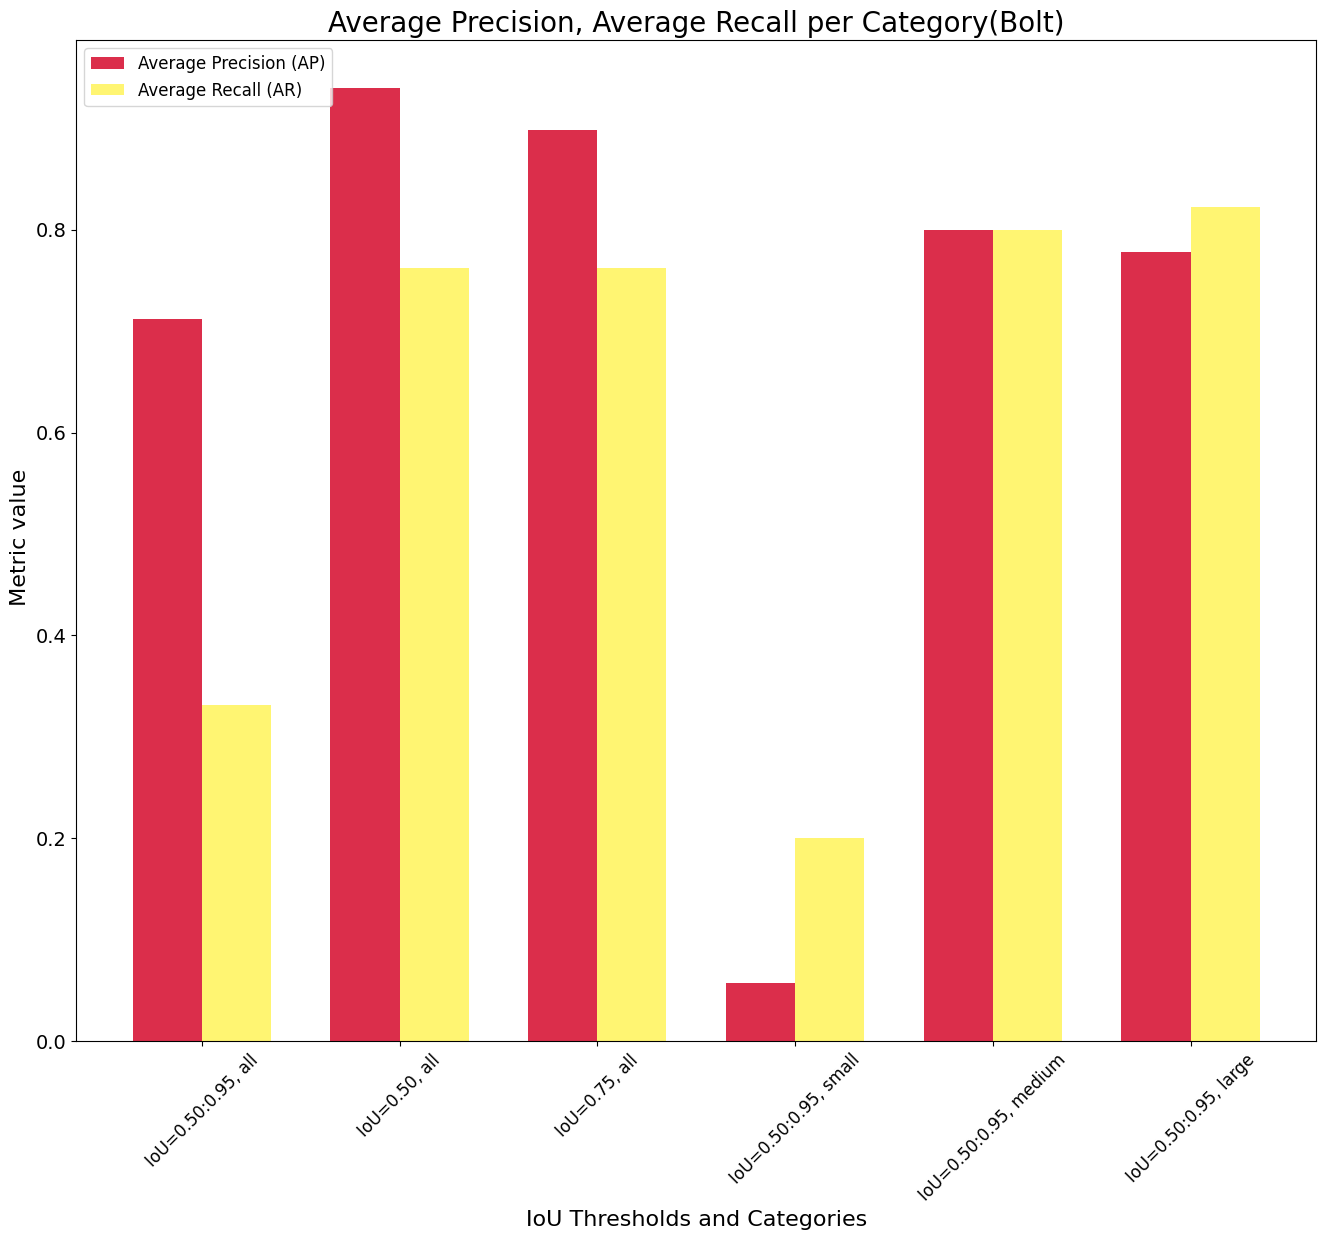

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
metrics = {
    'AP': [0.712, 0.940, 0.898, 0.057, 0.800, 0.778],
    'AR': [0.331, 0.762, 0.762, 0.200, 0.800, 0.822]
}
categories = ['IoU=0.50:0.95, all', 'IoU=0.50, all', 'IoU=0.75, all',
              'IoU=0.50:0.95, small', 'IoU=0.50:0.95, medium', 'IoU=0.50:0.95, large']

# Set up the matplotlib figure
bar_width = 0.35  # the width of the bars
index = np.arange(len(metrics['AP']))  # the label locations

fig, ax1 = plt.subplots(figsize=(16,13))

# Bar plots
rects1 = ax1.bar(index - bar_width/2, metrics['AP'], bar_width, label='Average Precision (AP)', color='#DB2E4B') # noqa
rects2 = ax1.bar(index + bar_width/2, metrics['AR'], bar_width, label='Average Recall (AR)', color='#FFF572') # noqa


# Labels and legends
ax1.set_xlabel('IoU Thresholds and Categories',fontsize=16)
ax1.set_ylabel(' Metric value',fontsize=16)
ax1.set_title('Average Precision, Average Recall per Category(Bolt)',fontsize=20)

# Adjust tick label size (new)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax1.set_xticks(index)
ax1.set_xticklabels(categories, rotation=45, fontsize=12)

ax1.legend(loc='upper left',fontsize = 'large')
plt.savefig('barplot.png')
#plt.show()
